In [12]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout


In [13]:
import pandas as pd

In [14]:
# Define the path to your dataset
dataset_path = '/content/drive/MyDrive/Dataset/thesisDataset.csv'
# Load your dataset
df = pd.read_csv(dataset_path)
df.head(5)

<ipython-input-14-8bc1a3fecc24>:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path)


,class,tweet
0,2.0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1.0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1.0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1.0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1.0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [15]:
print(df['tweet'][12])

" So hoes that smoke are losers ? " yea ... go on IG


In [16]:
df.shape


(1048575, 2)

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   24783 non-null  float64
 1   tweet   24783 non-null  object 
dtypes: float64(1), object(1)
memory usage: 16.0+ MB


In [18]:
# Using dropna() to remove rows with missing values
df_cleaned = df.dropna()

In [19]:
# Checking the information
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   24783 non-null  float64
 1   tweet   24783 non-null  object 
dtypes: float64(1), object(1)
memory usage: 16.0+ MB
None
(1048575, 2)


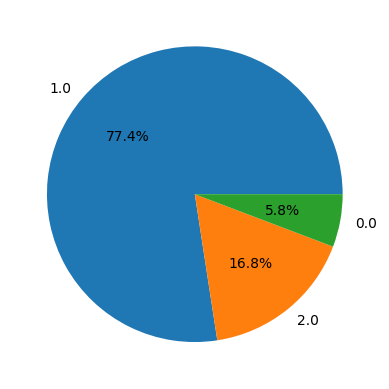

In [20]:
plt.pie(df['class'].value_counts().values,
		labels = df['class'].value_counts().index,
		autopct='%1.1f%%')
plt.show()


In [21]:
print(df['tweet'][5313])
print(df['tweet'][1153])
print(df['tweet'][352])

@_InhaleLove_ bitches love some Alex from target &#128527;
&#8220;@Bre_ah_na: @what_evaittakes it's too early, don't annoy me&#8221;&#128563; don't come back from ya fun filled weekend and give me attitude hoe
"@jgabsss: Stacey Dash won &#128166; http://t.co/PDLG46rjOL" baddest bitch evaaaa


In [22]:
class_counts = df['class'].value_counts()

# Display the counts
print(class_counts)

1.0    19190
2.0     4163
0.0     1430
Name: class, dtype: int64


In [23]:
# Remove empty rows
df = df.dropna()

# Get the total number of non-empty rows in the DataFrame
total_rows = df.shape[0]
print("Total number of non-empty rows:", total_rows)

Total number of non-empty rows: 24783


In [24]:
class_counts = df['class'].value_counts()

# Display the counts
print(class_counts)

1.0    19190
2.0     4163
0.0     1430
Name: class, dtype: int64


In [25]:

from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Data preprocessing steps
def preprocess_text(text):
    if not pd.isna(text):  # Check for NaN values
        # Remove HTML tags
        text = BeautifulSoup(str(text), "html.parser").get_text()
        # Convert to lowercase
        text = text.lower()
        # Tokenize text
        tokens = word_tokenize(text)
        # Remove punctuation and non-alphanumeric tokens
        tokens = [token for token in tokens if token.isalnum()]
        # Join tokens back into a sentence
        preprocessed_text = ' '.join(tokens)
        return preprocessed_text
    else:
        return ""

# Apply preprocessing to the 'tweet' column
df['Preprocessed_Sentence'] = df['tweet'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-25-3df9087c9570>:10: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(str(text), "html.parser").get_text()


In [26]:
print(df['Preprocessed_Sentence'][5313])
print(df['Preprocessed_Sentence'][1153])
print(df['Preprocessed_Sentence'][352])

bitches love some alex from target
it too early do annoy me do come back from ya fun filled weekend and give me attitude hoe
jgabsss stacey dash won http baddest bitch evaaaa


In [27]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df['Preprocessed_Sentence'], df['class'], stratify=df['class'])

In [28]:
from collections import Counter

label_counts = Counter(y_train)
label_0_count = label_counts[0]
label_1_count = label_counts[1]
label_2_count = label_counts[2]
print("Label 0 count:", label_0_count)
print("Label 1 count:", label_1_count)
print("Label 2 count:", label_2_count)

Label 0 count: 1073
Label 1 count: 14392
Label 2 count: 3122


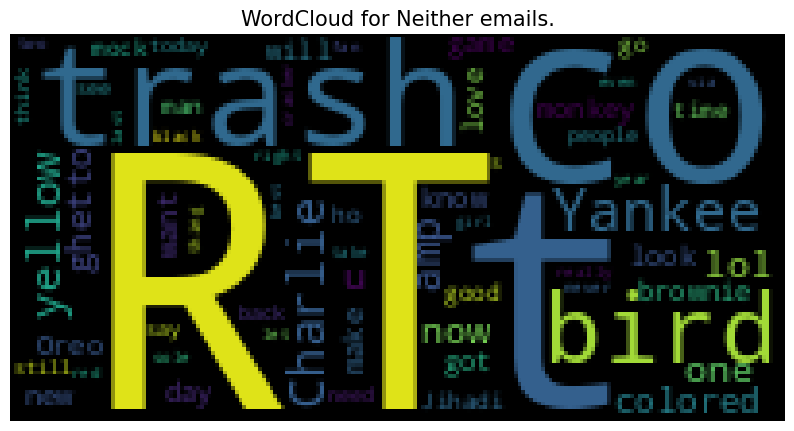

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(data, typ):
    # Joining all the tweets to get the corpus
    email_corpus = " ".join(data['tweet'])

    plt.figure(figsize=(10, 10))

    # Forming the word cloud
    wc = WordCloud(max_words=100,
                   width=200,
                   height=100,
                   collocations=False).generate(email_corpus)

    # Plotting the word cloud obtained above
    plt.title(f'WordCloud for {typ} emails.', fontsize=15)
    plt.axis('off')
    plt.imshow(wc)
    plt.show()
    print()

# Example usage:
plot_word_cloud(df[df['class']==2], typ='Neither')



In [31]:

class_2 = df[df['class'] == 2]
class_1 = df[df['class'] == 1].sample(n=3500)
class_0 = df[df['class'] == 0]

balanced_df = pd.concat([class_0, class_0, class_0, class_1, class_2], axis=0)

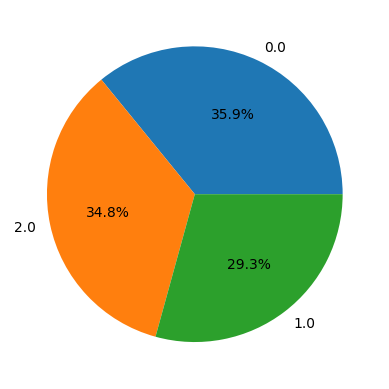

In [32]:
plt.pie(balanced_df['class'].value_counts().values, #balance the dataset
        labels=balanced_df['class'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [59]:
features = balanced_df['tweet'] #word to vector
target = balanced_df['class']

X_train, X_val, Y_train, Y_val = train_test_split(features,
                                                  target,
                                                  test_size=0.2,
                                                  random_state=22)
X_train.shape, X_val.shape

((9562,), (2391,))

In [60]:
Y_train = pd.get_dummies(Y_train)
Y_val = pd.get_dummies(Y_val)
Y_train.shape, Y_val.shape


((9562, 3), (2391, 3))

In [61]:
max_words = 5000
max_len = 100

token = Tokenizer(num_words=max_words,
                  lower=True,
                  split=' ')

token.fit_on_texts(X_train)

#We have fitted the tokenizer on our training data we will use it to convert the training and validation data both to vectors

In [62]:
# Splitting data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


# Training the tokenizer
max_words = 5000
token = Tokenizer(num_words=max_words, lower=True, split=' ')
token.fit_on_texts(X_train)

# Generating token embeddings
Training_seq = token.texts_to_sequences(X_train)
Training_pad = pad_sequences(Training_seq, maxlen=50, padding='post', truncating='post')

Validation_seq = token.texts_to_sequences(X_val)
Validation_pad = pad_sequences(Validation_seq, maxlen=50, padding='post', truncating='post')

Testing_seq = token.texts_to_sequences(X_test)
Testing_pad = pad_sequences(Testing_seq, maxlen=50, padding='post', truncating='post')


In [41]:
# Define the Bi-LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=50))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(3, activation='softmax'))  # Assuming you have 3 classes


In [42]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 128)           640000    
                                                                 
 bidirectional (Bidirection  (None, 50, 128)           98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 780227 (2.98 MB)
Trainable params: 780227 (2.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
# Train the model
history = model.fit(Training_pad, Y_train, epochs=10, batch_size=32, validation_data=(Validation_pad, Y_val))

Epoch 1/10
240/240 [==============================] - 50s 162ms/step - loss: 0.6373 - accuracy: 0.7149 - val_loss: 0.4263 - val_accuracy: 0.8484
Epoch 2/10
240/240 [==============================] - 32s 131ms/step - loss: 0.2736 - accuracy: 0.9051 - val_loss: 0.3863 - val_accuracy: 0.8704
Epoch 3/10
240/240 [==============================] - 34s 142ms/step - loss: 0.1826 - accuracy: 0.9365 - val_loss: 0.4175 - val_accuracy: 0.8761
Epoch 4/10
240/240 [==============================] - 33s 136ms/step - loss: 0.1280 - accuracy: 0.9582 - val_loss: 0.4318 - val_accuracy: 0.8599
Epoch 5/10
240/240 [==============================] - 34s 140ms/step - loss: 0.0902 - accuracy: 0.9728 - val_loss: 0.4347 - val_accuracy: 0.8787
Epoch 6/10
240/240 [==============================] - 33s 139ms/step - loss: 0.0647 - accuracy: 0.9824 - val_loss: 0.4869 - val_accuracy: 0.8751
Epoch 7/10
240/240 [==============================] - 34s 140ms/step - loss: 0.0552 - accuracy: 0.9859 - val_loss: 0.4882 - val_ac

Epoch 1/10
240/240 [==============================] - 43s 178ms/step - loss: 0.0353 - accuracy: 0.9893 - val_loss: 0.5462 - val_accuracy: 0.8782
Epoch 2/10
240/240 [==============================] - 33s 139ms/step - loss: 0.0298 - accuracy: 0.9912 - val_loss: 0.5374 - val_accuracy: 0.8902
Epoch 3/10
240/240 [==============================] - 32s 135ms/step - loss: 0.0245 - accuracy: 0.9914 - val_loss: 0.5301 - val_accuracy: 0.8887
Epoch 4/10
240/240 [==============================] - 34s 143ms/step - loss: 0.0227 - accuracy: 0.9923 - val_loss: 0.6308 - val_accuracy: 0.8735
Epoch 5/10
240/240 [==============================] - 33s 140ms/step - loss: 0.0240 - accuracy: 0.9923 - val_loss: 0.6720 - val_accuracy: 0.8714
Epoch 6/10
240/240 [==============================] - 33s 136ms/step - loss: 0.0182 - accuracy: 0.9944 - val_loss: 0.5718 - val_accuracy: 0.8876
Epoch 7/10
240/240 [==============================] - 33s 136ms/step - loss: 0.0226 - accuracy: 0.9927 - val_loss: 0.6426 - val_ac

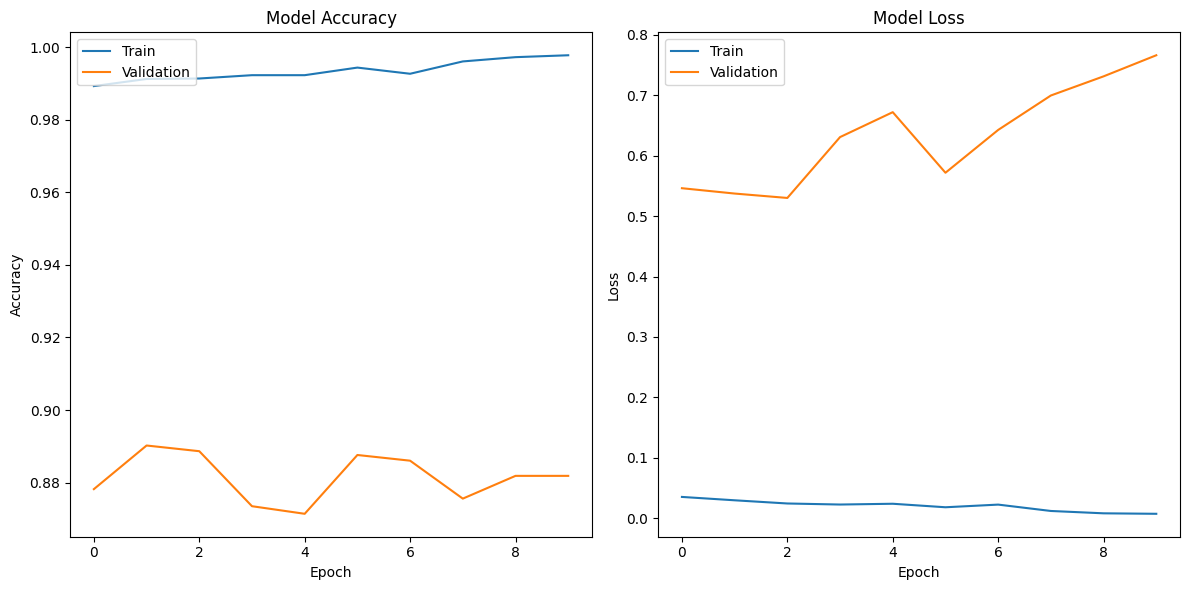

In [45]:
import matplotlib.pyplot as plt

# Train the model and capture the history
history = model.fit(Training_pad, Y_train, epochs=10, batch_size=32, validation_data=(Validation_pad, Y_val))

# Visualize the training history epoch-by-epoch
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Plot the history
plot_history(history)


In [63]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(Validation_pad, Y_val)
print(f'Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}')


60/60 [==============================] - 3s 45ms/step - loss: 0.7662 - accuracy: 0.8819
Validation Loss: 0.7662, Validation Accuracy: 0.8819


In [66]:
model.save("text_classification_model.keras")


In [67]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("text_classification_model.keras")  # Update with your model file name




In [88]:
# Function to make a prediction on a single sentence
def predict_single_sentence(sentence):
    # Preprocess the input sentence
    processed_sentence = preprocess_single_sentence(sentence)

    # Tokenize and pad the sequence
    sequence = token.texts_to_sequences([processed_sentence])
    padded_sequence = pad_sequences(sequence, maxlen=50, padding='post', truncating='post')

    # Make a prediction
    prediction = model.predict(padded_sequence)

    # Assuming your model has 3 classes
    predicted_class = prediction.argmax(axis=1)[0]

    # Map the predicted class to the corresponding label
    class_labels = {0: " Hate", 1: "offensive", 2: "Neither"}
    predicted_label = class_labels[predicted_class]

    return predicted_label

# Example usage
input_sentence = "i will kill you"
predicted_label = predict_single_sentence(input_sentence)

print(f"Predicted Label: {predicted_label}")


1/1 [==============================] - 0s 56ms/step
Predicted Label:  Hate
